## Implementando Problemas de OR - Parte II

**Autor:** Guilherme Cadori

**Data:** 26/03/2024

### Problema 2

#### Interpretação do Problema


##### Índices
- $j$ : tipo de carga, $j$ = {1, 2, 3, 4, 5}
- $i$ : tipo de compartimento para variáveis discretas, $i$ = {1, 2, 3}
- $k$ : tipo de compartimento para variáveis contínuas, $k$ = {4}

##### Variáveis de Decisão
- $x_{ij}$ : Quantidade de cada carga do tipo $j$ a ser transportada no compartimento $i$, sendo este um conjunto de variáveis discretas, para todo $i$ = {1, 2, 3}
- $y_{jk}$ : Quantidade de cada carga do tipo $j$ a ser transportada no compartimento $k$, sendo este um conjunto de variáveis contínuas, para todo $k$ = {4}

##### Objetivo
- Maximizar lucro da carga total carregada no avião

##### Restrições
- Restrições de Capacidade de Peso
- Restrições de Capacidade de Volume
- Restrições de Equilibrio de Carga entre Compartimentos

##### Parâmetros
- $CAPACIDADE \,\, PESO_{i}$ : Capacidade de peso do compartimento *i*
- $CAPACIDADE \,\, VOL_{i}$ : Capacidade de volume do compartimento *i*
- $PESO_{j}$ : Peso unitário da carga *j*
- $VOL_{j}$ : Volume unitário da carga *j*
- $LUCRO_{j}$ : Lucro unitário da carga *j*


#### Representação Gráfica: Relação tipo de carga *j* e compartimento *i* ou *k*


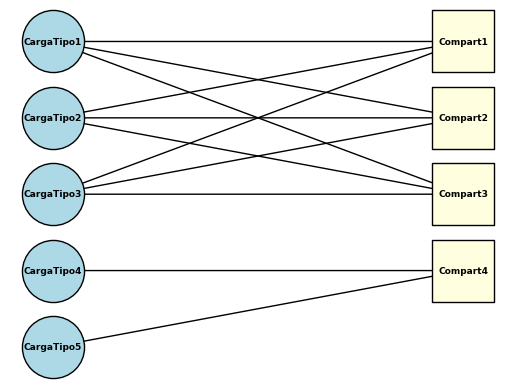

In [1]:
# Importando bibliotecas de trabalho
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo vazio
G = nx.DiGraph()

# Inserindo nós para os tipos de carga
G.add_node("CargaTipo1", shape='o')
G.add_node("CargaTipo2", shape='o')
G.add_node("CargaTipo3", shape='o')
G.add_node("CargaTipo4", shape='o')
G.add_node("CargaTipo5", shape='o')

# Inserindo nós para os tipos de compartimento
G.add_node("Compart1", shape='s')
G.add_node("Compart2", shape='s')
G.add_node("Compart3", shape='s')
G.add_node("Compart4", shape='s')

# Criando arcos de relações entre tipos de carga e tipos de compartimento
G.add_edges_from([("CargaTipo1", "Compart1"), ("CargaTipo1", "Compart2"), ("CargaTipo1", "Compart3"),
                  ("CargaTipo2", "Compart1"), ("CargaTipo2", "Compart2"), ("CargaTipo2", "Compart3"),
                  ("CargaTipo3", "Compart1"), ("CargaTipo3", "Compart2"), ("CargaTipo3", "Compart3"),
                  ("CargaTipo4", "Compart4"), ("CargaTipo5", "Compart4")
                 ])

# Desenhando o grafo
pos = {"CargaTipo1": (0, 1), "CargaTipo2": (0, 0), "CargaTipo3": (0, -1), "CargaTipo4": (0, -2), "CargaTipo5": (0, -3),
       "Compart1": (2, 1), "Compart2": (2, 0), "Compart3": (2, -1), "Compart4": (2, -2)}

# Separando os nós por categoria para serem desenhados separadamente
circle_nodes = [node for node, attributes in G.nodes(data=True) if attributes['shape'] == 'o']
square_nodes = [node for node, attributes in G.nodes(data=True) if attributes['shape'] == 's']

node_options = {
    'node_size': 2000,
    'linewidths': 1,
    'edgecolors': 'black',
}

# Especificações de cada tipo de nó
nx.draw_networkx_nodes(G, pos, nodelist=circle_nodes, node_shape='o', node_color='lightblue', **node_options)
nx.draw_networkx_nodes(G, pos, nodelist=square_nodes, node_shape='s', node_color='lightyellow', **node_options)

# Especificações dos arcos
edge_options = {
    'edge_color': 'black',
    'arrows': True,
    'width': 1
}

# Plotando arcos
nx.draw_networkx_edges(G, pos, **edge_options)

# Plotando rótulos
labels = {node: node for node in G.nodes()}
label_options = {
    'font_size': 6.5,
    'font_weight': 'bold'
}
nx.draw_networkx_labels(G, pos, labels, **label_options)

# Plotando o grafo final
plt.axis('off')

plt.show()



#### Formulação do Matemática


$\displaystyle \max z = \sum_{j=1}^{3} \text{LUCRO}_j \cdot \text{PESO}_j \cdot x_{ij} + \sum_{j=4}^{5} \text{LUCRO}_j \cdot \text{PESO}_j \cdot y_{jk} $

$\displaystyle \text{s.t.} $

$\displaystyle \text(1) \sum_{j=1}^{3} \text{PESO}_j \cdot x_{ij} \leq \text{CAPACIDADE PESO}_i \quad \forall \, i \in \{1, 2, 3\} $

$\displaystyle \text(2) \sum_{j=4}^{5} \text{PESO}_j \cdot y_{jk} \leq \text{CAPACIDADE PESO}_k \quad \forall \, k \in \{4\} $

$\displaystyle \text(3) \sum_{j=1}^{3} \text{VOL}_j \cdot x_{ij} \leq \text{CAPACIDADE VOL}_i \quad \forall \, i \in \{1, 2, 3\} $

$\displaystyle \text(4) \sum_{i=1} \text{PESO}_j \cdot x_{1j} = 
\sum_{i=2} \text{PESO}_j \cdot x_{2j} =
\sum_{i=3} \text{PESO}_j \cdot x_{3j} =
\sum_{k=4} \text{PESO}_j \cdot y_{j4}  \quad \forall \, j \in \{1,..., 5\}$

$\displaystyle x_{ij} \geq 0 \quad \forall \, j \in \{1, 2, 3\} $

$\displaystyle y_{jk} \geq 0 \quad \forall \, j \in \{4, 5\} $

$\displaystyle x_{ij} \in \mathbb{R} $

$\displaystyle y_{jk} \in \mathbb{Z} $


#### Implementação do Modelo

In [2]:
# Importando biblioteca de trabalho
import gurobipy as gp


# Criando parâmetros
# RHS - Capacidade de peso por compartimento
compartimentoPeso, capacidadePeso = gp.multidict({
    'Compartimento Frontal': 5,
    'Compartimento Central': 7,
    'Compartimento Cauda': 6,
    'Compartimento Porão Granel': 7
})


# RHS - Capacidade de volume por compartimento
compartimentoVol, capacidadeVol = gp.multidict({
    'Compartimento Frontal': 35,
    'Compartimento Central': 55,
    'Compartimento Cauda': 30,
    'Compartimento Porão Granel': 30
})


# LHS - Parâmetros de peso por unidade
pesoCargaUnit_Int = {
    'Tipo1': 0.7,
    'Tipo2': 0.9,
    'Tipo3': 0.2
}

pesoCargaUnit_Cont = {
    'Tipo4': 1.2,
    'Tipo5': 1.7
}


# LHS - Parâmetros de volume por unidade
volCargaUnit_Int = {
    'Tipo1': 0.5,
    'Tipo2': 1,
    'Tipo3': 0.25
}


# FO - Criando parâmetros de lucro por tipo de carga INTEIRA
tipoCarga_Int, lucro_Int = gp.multidict({
    'Tipo1': 200,
    'Tipo2': 220,
    'Tipo3': 175
})


# FO - Criando parâmetros de lucro por tipo de carga CONTÍNUA
tipoCarga_Cont, lucro_Cont = gp.multidict({
    'Tipo4': 235,
    'Tipo5': 180
})


# Criando o modelo
m = gp.Model('Max Lucro Carga')


# Criando variáveis de decisão
qt_tipoCarga_Int = m.addVars(tipoCarga_Int,
                             vtype = gp.GRB.INTEGER, 
                             name = 'Tipo de Carga Inteira')


qt_tipoCarga_Cont = m.addVars(tipoCarga_Cont, 
                              vtype = gp.GRB.CONTINUOUS, 
                              name = 'Tipo de Carga Contínua')



Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-27


In [3]:
# Conferindo as variáveis criadas
print(qt_tipoCarga_Int)

print(qt_tipoCarga_Cont)


{'Tipo1': <gurobi.Var *Awaiting Model Update*>, 'Tipo2': <gurobi.Var *Awaiting Model Update*>, 'Tipo3': <gurobi.Var *Awaiting Model Update*>}
{'Tipo4': <gurobi.Var *Awaiting Model Update*>, 'Tipo5': <gurobi.Var *Awaiting Model Update*>}


In [4]:
# Criando restrições de capacidade de peso para variáveis inteiras
restrPeso_Int = m.addConstrs(
    (sum(pesoCargaUnit_Int[j] * qt_tipoCarga_Int[j] for j in tipoCarga_Int) <= capacidadePeso[i]
     for i in compartimentoPeso[:3]),
    name = 'Restrições de Capacidade de Peso Inteira'
)


# Criando restrições de capacidade de peso para variáveis contínuas
restrPeso_Cont = m.addConstrs(
    (sum(pesoCargaUnit_Cont[j] * qt_tipoCarga_Cont[j] for j in tipoCarga_Cont) <= capacidadePeso[i]
     for i in compartimentoPeso[3:]),
    name = 'Restrições de Capacidade de Peso Contínua'
)


#Conferindo restrições criadas
print(restrPeso_Cont)
restrPeso_Int



{'Compartimento Porão Granel': <gurobi.Constr *Awaiting Model Update*>}


{'Compartimento Frontal': <gurobi.Constr *Awaiting Model Update*>,
 'Compartimento Central': <gurobi.Constr *Awaiting Model Update*>,
 'Compartimento Cauda': <gurobi.Constr *Awaiting Model Update*>}

In [5]:
# Criando restrições de capacidade de volume para variáveis inteiras
restrVol_Int = m.addConstrs(
    (sum(volCargaUnit_Int[j] * qt_tipoCarga_Int[j] for j in tipoCarga_Int) <= capacidadeVol[i]
     for i in compartimentoVol[:3]),
    name = 'Restrições de Capacidade de Peso Inteira'
)


#Conferindo restrições criadas
restrVol_Int



{'Compartimento Frontal': <gurobi.Constr *Awaiting Model Update*>,
 'Compartimento Central': <gurobi.Constr *Awaiting Model Update*>,
 'Compartimento Cauda': <gurobi.Constr *Awaiting Model Update*>}

In [6]:
# Criando restrições de distribuição de peso das cargas nos compartimentos
# Adicionar restrição de ordem crescente para o peso total em cada compartimento
for i in range(len(compartimentoPeso) - 1):
    compartimento_atual = compartimentoPeso[i][0]
    prox_compartimento = compartimentoPeso[i + 1][0]
    m.addConstr(
        gp.quicksum(qt_tipoCarga_Int[tipo_carga] * pesoCargaUnit_Int[tipo_carga] for tipo_carga in tipoCarga_Int)
        + gp.quicksum(qt_tipoCarga_Cont[tipo_carga] * pesoCargaUnit_Cont[tipo_carga] for tipo_carga in tipoCarga_Cont)
        <= gp.quicksum(qt_tipoCarga_Int[tipo_carga] * pesoCargaUnit_Int[tipo_carga] for tipo_carga in tipoCarga_Int)
        + gp.quicksum(qt_tipoCarga_Cont[tipo_carga] * pesoCargaUnit_Cont[tipo_carga] for tipo_carga in tipoCarga_Cont),
        name=f'OrdemCrescente_{compartimento_atual}_{prox_compartimento}'
    )


In [8]:
# Criando a função objetivo
FObj = (
    sum(lucro_Int[j] * pesoCargaUnit_Int[j] * qt_tipoCarga_Int[j] for j in tipoCarga_Int) +
    sum(lucro_Cont[j] * pesoCargaUnit_Cont[j] * qt_tipoCarga_Cont[j] for j in tipoCarga_Cont)
)


# Definindo a função objetivo no modelo
m.setObjective(FObj, gp.GRB.MAXIMIZE)


# Resolvendo o modelo
m.optimize()



Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 5 columns and 20 nonzeros
Model fingerprint: 0x3c0c1b21
Variable types: 2 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-01, 2e+00]
  Objective range  [4e+01, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 6e+01]
Found heuristic solution: objective 2625.0000000
Presolve removed 9 rows and 2 columns
Presolve time: 0.01s
Presolved: 1 rows, 3 columns, 3 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)

Root relaxation: objective 2.735000e+03, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2735.00000    0  

In [9]:
# Resultados do modelo resolvido
# Verificando a quantidade de cada tipo de carga alocada em cada compartimento
print("Quantidade de cada tipo de carga alocada em cada compartimento:")
for compartimento in compartimentoPeso[:3]:
    for tipo in tipoCarga_Int:
        valor = qt_tipoCarga_Int.sum(tipo, compartimento).getValue()
        if valor > 0:
            print(f"{compartimento}, Carga {tipo}, Quantidade: {valor}")

for compartimento in compartimentoPeso[3:]:
    for tipo in tipoCarga_Cont:
        valor = qt_tipoCarga_Cont.sum(tipo, compartimento).getValue()
        if valor > 0:
            print(f"{compartimento}, Carga {tipo}, Quantidade: {round(valor, 1)}")
    
# Valor da Função Objetivo
print("\nLucro Total: R$", round(m.objVal, 2))



Quantidade de cada tipo de carga alocada em cada compartimento:
Compartimento Frontal, Carga Tipo1, Quantidade: 2.0
Compartimento Frontal, Carga Tipo2, Quantidade: 4.0
Compartimento Central, Carga Tipo1, Quantidade: 2.0
Compartimento Central, Carga Tipo2, Quantidade: 4.0
Compartimento Cauda, Carga Tipo1, Quantidade: 2.0
Compartimento Cauda, Carga Tipo2, Quantidade: 4.0
Compartimento Porão Granel, Carga Tipo4, Quantidade: 5.8

Lucro Total: R$ 2717.0


**Conclusão:** Dados os resultados acima observamos que a cargas se encontram equilibradas de forma adequada entre os compartimentos, uma vez a mesma quantidade de cada tipo de carga foi utilizada em cada compartimento. Além disso também foi  possível maximizar o lucro com o plano de carregamento do avião cargueiro.

***
**Fim**
***